# NOAA Weather Data

## Obtaining the Data

In [1]:
#Importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Understanding 

Data was obtained from the National Oceanic and Atmospheric Administration (NOAA) National Climatic Data Center (NCDC) using the Climate Data Online (CDO) database. The CDO provides free access to NCDC's archive of global historical weather and climate data in addition to station history information. These data include quality controlled daily, monthly, seasonal, and yearly measurements of temperature, precipitation, wind, and degree days as well as radar data and 30-year Climate Normals. 

Data from NOAA was selected because it provides daily summaries for average wind speed and fastest 2 minute wind gust for the five hurricanes we wanted to examine. 

For the purpose of this project we will be looking at six hurricanes: 
- Charley 
- Dennis 
- Matthew 
- Irma 
- Michael 
- Ian 

We will be using information from hurricane Charley, Dennis, Matthew, Irma, Michael to create our models and validating our model with recent data from Hurricane Ian. 

### NOAA Data Column Descriptions   
|Column Name | Description | 
|---|---|
| **NAME**| is the name of the station (usually city/airport name). 
|**LATITUDE** | latitude (decimated degrees w/northern hemisphere values > 0, southern hemisphere values < 0)
| **LONGITUDE** |  longitude (decimated degrees w/western hemisphere values < 0, eastern hemisphere values > 0) 
| **DATE** |is the year of the record (4 digits) followed by month (2 digits) and day (2 digits).
|**AWND** |Average daily wind speed (meters per second) |    
|**WSF2** |  Fastest 2-minute wind speed (in meters per second) |  
|**HurricaneName**| Numerical label given to each hurricane. 1 = Charley, 2 = Dennis, 3 = Matthew, 4 = Irma, 5= Michael | 
|**COORD**| Engineered column representing coordinates created by combining LATITUDE and LONGITDE |
|**City** | Engineered column representing cities created by running coordinates through geopy reverse geolocater. |

### Citations:   
Centers N. Select a Location | Data Tools | Climate Data Online (CDO) | National Climatic Data Center (NCDC). Noaa.gov. Published 2019. https://www.ncdc.noaa.gov/cdo-web/datatools/selectlocation   

Hurricanes. coast.noaa.gov. https://coast.noaa.gov/hurricanes/

National Centers for Environmental Information (NCEI. Climate Data Online (CDO) - The National Climatic Data Center’s (NCDC) Climate Data Online (CDO) provides free access to NCDC’s archive of historical weather and climate data in addition to station history information. | National Climatic Data Center (NCDC). Noaa.gov. Published 2019. https://www.ncdc.noaa.gov/cdo-web/   



In [2]:
#opening the datasets
ian = pd.read_csv(r'data\ian.csv')
matthew = pd.read_csv(r'data\matthew.csv')
irma =  pd.read_csv(r'data\irma.csv')
michael =  pd.read_csv(r'data\michael.csv')
charley = pd.read_csv(r'data\charley.csv')
dennis = pd.read_csv(r'data\dennis.csv')

### Data Cleaning 
Let's remove duplicate values and keep only the value with the highest wind speed. 

In [3]:
#removing duplicates 
charley = charley.sort_values('AWND', ascending=False).drop_duplicates('NAME').sort_index()
dennis = dennis.sort_values('AWND', ascending=False).drop_duplicates('NAME').sort_index()
matthew = matthew.sort_values('AWND', ascending=False).drop_duplicates('NAME').sort_index()
irma = irma.sort_values('AWND', ascending=False).drop_duplicates('NAME').sort_index()
michael = michael.sort_values('AWND', ascending=False).drop_duplicates('NAME').sort_index()
ian = ian.sort_values('AWND', ascending=False).drop_duplicates('NAME').sort_index()

## Data Engineering 
We want to be able to compare data from all five hurricanes against home value. So we are going to concat them all into one data frame. 

### Concating the Hurricane Dataframes

In [4]:
#creating a column with a label for each hurricane 
#this way we can still know which hurricane we are referencing

#charley
charley['HurricaneName'] = 'charley'

#dennis 
dennis['HurricaneName'] = 'dennis'

#matthew 
matthew['HurricaneName'] = 'matthew'

#irma 
irma['HurricaneName'] = 'irma'

#michael 
michael['HurricaneName'] = 'michael'

#ian 
ian['HurricaneName'] = 'ian'


In [5]:
#making sure it looks good 
charley.head()

,NAME,LATITUDE,LONGITUDE,DATE,AWND,WSF2,HurricaneName
0,"FORT PIERCE, FL US",27.4419,-80.3508,8/13/2004,NaN,NaN,charley
2,"FORT PIERCE ARC, FL US",27.4272,-80.4053,8/13/2004,NaN,NaN,charley
4,"BIG CYPRESS, FL US",26.3283,-80.9958,8/13/2004,NaN,NaN,charley
6,"HOMESTEAD GEN AVIATION AIRPORT, FL US",25.5011,-80.5500,8/13/2004,NaN,NaN,charley
8,"LOXAHATCHEE NWR, FL US",26.4985,-80.2160,8/13/2004,NaN,NaN,charley


In [6]:
#concating the six dataframes into one 
hurricane = pd.concat([charley, dennis, matthew, irma, michael, ian], ignore_index=True)
hurricane.head()

,NAME,LATITUDE,LONGITUDE,DATE,AWND,WSF2,HurricaneName
0,"FORT PIERCE, FL US",27.4419,-80.3508,8/13/2004,NaN,NaN,charley
1,"FORT PIERCE ARC, FL US",27.4272,-80.4053,8/13/2004,NaN,NaN,charley
2,"BIG CYPRESS, FL US",26.3283,-80.9958,8/13/2004,NaN,NaN,charley
3,"HOMESTEAD GEN AVIATION AIRPORT, FL US",25.5011,-80.5500,8/13/2004,NaN,NaN,charley
4,"LOXAHATCHEE NWR, FL US",26.4985,-80.2160,8/13/2004,NaN,NaN,charley


In [7]:
hurricane.describe()

,LATITUDE,LONGITUDE,AWND,WSF2
count,2494.000000,2494.000000,266.000000,264.000000
mean,28.311389,-82.073998,17.902218,33.542045
std,1.600142,1.672985,7.781214,13.890268
min,24.550659,-87.467244,2.910000,0.000000
25%,27.150977,-82.514912,12.805000,23.900000
50%,28.298745,-81.757617,15.660000,30.000000
75%,29.729953,-80.906335,21.920000,42.900000
max,30.964030,-80.034979,40.710000,87.000000


In [8]:
#data types are object and float 
#currently have 5571 entries 
#AWND is missing a lot of values 
hurricane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           2494 non-null   object 
 1   LATITUDE       2494 non-null   float64
 2   LONGITUDE      2494 non-null   float64
 3   DATE           2494 non-null   object 
 4   AWND           266 non-null    float64
 5   WSF2           264 non-null    float64
 6   HurricaneName  2494 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.5+ KB


### Scrubbing the Data

In [9]:
#AWND is missing 5070 
#We are going to drop any rows where wind speed is missing
#Dropping is the best solution here because wind speed 
#Will not be accurately reflected by the mean in cities hit by the hurricane 
hurricane.isnull().sum()

NAME                0
LATITUDE            0
LONGITUDE           0
DATE                0
AWND             2228
WSF2             2230
HurricaneName       0
dtype: int64

In [10]:
#dropping all rows with missing values 
hurricane.dropna(inplace= True)

In [11]:
#checking that dataframe is clean 
hurricane.isnull().sum()

NAME             0
LATITUDE         0
LONGITUDE        0
DATE             0
AWND             0
WSF2             0
HurricaneName    0
dtype: int64

In [12]:
#currently AWND and WSF2 are in meter per second
#let's change that to miles per hour for user understanding
#meter per second * 2.2369 = miles per hour
hurricane['AWND'] = (hurricane['AWND']*2.2369)
hurricane['WSF2'] = (hurricane['WSF2']*2.2369)

### Data Exploration

#### Exploring all hurricanes
The fastest average wind speed accross all hurricanes was 91 mph and fastest two minute wind gust was 194 mph. 

In [13]:
#Looking at stats for all hurricanes 
hurricane.describe()

,LATITUDE,LONGITUDE,AWND,WSF2
count,260.000000,260.00000,260.000000,260.000000
mean,28.178982,-82.31930,40.430763,74.971424
std,1.886234,2.03567,17.180567,31.242263
min,24.557060,-87.31667,9.998943,0.000000
25%,26.538050,-82.68555,29.012593,53.461910
50%,28.061370,-81.75684,35.029854,66.100395
75%,30.233330,-80.63560,49.161470,95.963010
max,30.843150,-80.09918,91.064199,194.610300


#### Visualizing Wind Speed 

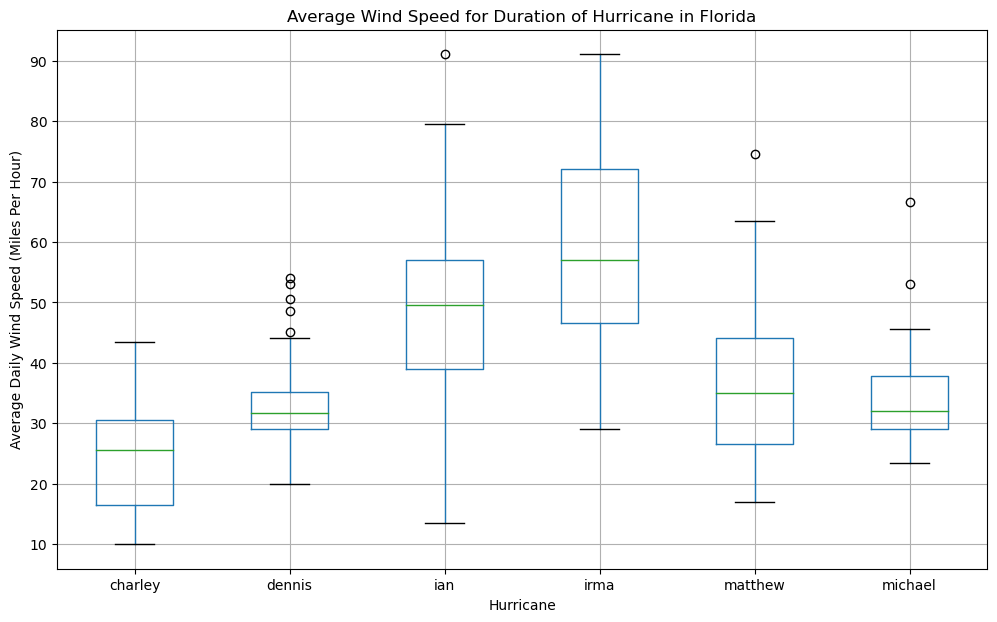

In [14]:
#Generate a box and whiskers plot for all six hurricanes
#creating a dataframe that has just HurricaneName and AWND
hurricane_bw = hurricane[['HurricaneName', 'AWND']]
#pivoting the values 
hurricane_bw = hurricane_bw.pivot(columns='HurricaneName', values='AWND')
#plotting
box = hurricane_bw.boxplot(figsize = (12,7,));
box.plot()
#adding title
plt.title('Average Wind Speed for Duration of Hurricane in Florida')
#adding xlabel 
plt.xlabel('Hurricane')
#adding ylabel
plt.ylabel('Average Daily Wind Speed (Miles Per Hour)');

In [15]:
#creating a scatterplot function 
def scatterplot(df):
    #importing image for background 
    img = plt.imread(r"data\images\floridamap.jpg")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-87, -80, 25, 31])
    #plotting scatter plot 
    plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'], s=50, c=df['WSF2'], cmap='plasma')
    #title
    plt.title('Fastest 2 Minute Wind Gust')
    #xlabel
    plt.xlabel('Longitude')
    #y label
    plt.ylabel('Latitude')
    #legend
    ax.legend(df['HurricaneName'])
    return plt.show()

In [16]:
#applying scatterplot function to our hurricanes
scatterplot(charley)
scatterplot(dennis)
scatterplot(matthew)
scatterplot(irma)
scatterplot(michael)
scatterplot(ian)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\images\\floridamap.jpg'

### Data Engingeering 

#### Using Geopy to Get Cities

In order to join the hurricane dataframe to the housing dataframe we will need to know the city names. Using the coordinates provided by the NOAA dataset we can use geopy to reverse geolocate the city names. 

Due to this being an API not all request could be completed and some city names had to be annoitated in excel. 

Citation:  
kumar_satyam. Get the city, state, and country names from latitude and longitude using Python. GeeksforGeeks. Published October 15, 2020. https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/

In [ ]:
#importing libraries 
from tkinter import *
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon

# Create an instance of tkinter frame
win = Tk()

# Define geometry of the window
win.geometry("700x350")

#### Getting Coordinates

In [ ]:
#Engingeering a coordinates column out of latitude and longitude 
#We need coordinates to use geopy 

hurricane['COORD'] = list(zip(hurricane.LATITUDE, hurricane.LONGITUDE))

hurricane.head()

In [ ]:
#creating a function 
def get_city(coords):
    #instantiate the Nominatim API 
    geolocator = Nominatim(user_agent="MyApp")
    #get the city from the coordinates 
    location = geolocator.reverse(coords)
    address = location.raw['address']
    city = address.get('city', '')
    #return the city 
    return city

In [ ]:
#applying function to dataframe
hurricane['City'] = hurricane['COORD'].apply(get_city)

In [ ]:
#looks good 
hurricane.isnull().sum()

In [ ]:
hurricane.describe()

#### Saving the Dataframe 

In [ ]:
#saving the dataframe
hurricane.to_csv(r'data\hurricane.csv', index=False)